In [1]:
import csv
import matplotlib.pyplot as plt
import json
import numpy as np
import threading
import pandas as pd
from os import listdir
from os.path import isfile, join
from glob import glob
import os
import shutil

This code is in place to create graphs that are able to visualise the amount of money that is being spent on each game. Due to having a limited number of games this was done in a per game way.


In [2]:
onlyfiles = [f for f in listdir("marketplaceFiles/actualPlayerData/csvActualPlayerData/") if isfile(join("marketplaceFiles/actualPlayerData/csvActualPlayerData/", f))]
print(len(onlyfiles))
onlyfiles2 = [f for f in listdir("marketplaceFiles/marketCompleteSheets/result/") if isfile(join("marketplaceFiles/marketCompleteSheets/result/", f))]
print(len(onlyfiles2))

2038
33


In [3]:
onlyfiles2 = [f for f in listdir("marketplaceFiles/marketCompleteSheets/result/") if isfile(join("marketplaceFiles/marketCompleteSheets/result/", f))]
print(len(onlyfiles2))
game =[]
for x in onlyfiles2:
    game.append(x.replace("_Compiled_0.csv",""))
    #252490
game = game[25:26]
print(game)

33
['252490']


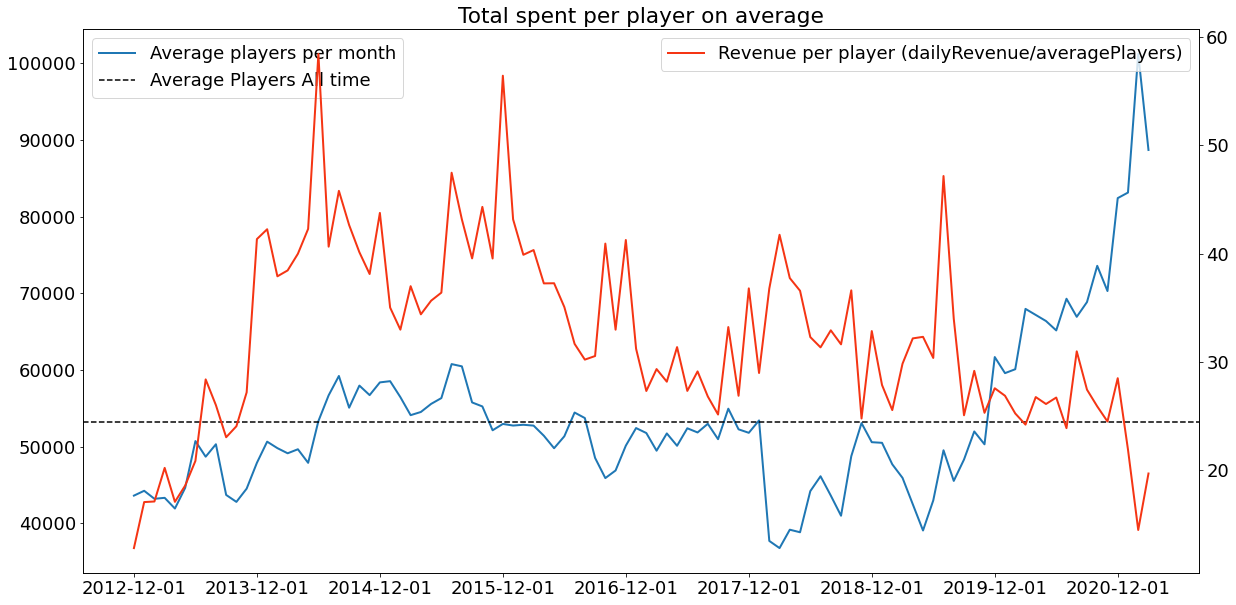

In [10]:
for x in range(0,len(game)):
    df1=pd.read_csv("marketplaceFiles/actualPlayerData/csvActualPlayerData/"+str(game[x])+".txt")
    df1.columns = ["date","PeakPlayers", "AveragePlayers"]
    df1.set_index("date")
    df1 = df1.sort_values(by="date")
    mean = df1["AveragePlayers"].mean()
    df1=df1[5:]#
    df2=pd.read_csv("marketplaceFiles/marketCompleteSheets/result/"+str(game[x])+"_Compiled_0.csv")
    df2["date"] =pd.to_datetime(df2["date"])
    df2.set_index("date",drop=True)#
    df2 =df2.groupby(pd.Grouper(key="date",freq="M")).sum()#
    total = df2[str(game[x])+"_Compiled_0.csv"].to_list()#
    players = df1["AveragePlayers"].to_list()
    norm=[]
    # in  this loop due to some games playing data being collected before the marketdata the range(0, len("value")) will have to change between "total" and "players"
    #to ensure both were the same length would require too much data collection at this stage
    for co in range(0,len(total)):#
        k = total[co]/players[co]
        norm.append(k)
    figure, ax1 = plt.subplots(figsize=(20, 10))#
    ax1.plot(df1[df1.columns[0]],df1[df1.columns[2]],linewidth=2,zorder=2)
    ax2= ax1.twinx()
    ax2.plot(norm,linewidth=2,zorder=1,color = '#f53514')
    ax1.set_xticks(range(0,108,12))
    averageplayers=ax1.axhline(mean,color="black",ls="--")
    averageplayers.set_label("Average Players")
    ax1.title.set_text("Total spent per player on average")
    ax1.legend(["Average players per month","Average Players All time"],loc="upper left")
    ax2.legend(["Revenue per player (dailyRevenue/averagePlayers)"],loc="best")
    print(game[x])
    plt.savefig("Graphs/"+str(game[x])+"_graph.png")


In [ ]:
print(mean)

In [22]:
df2=pd.read_csv("marketplaceFiles/marketCompleteSheets/result/440_Compiled_0.csv")
df2["date"] =pd.to_datetime(df2["date"])
df2.set_index("date",drop=True)
df2.head(5)

,date,dailyTotal_0,dailyTotal_1,dailyTotal_2,dailyTotal_3,dailyTotal_4,dailyTotal_5,dailyTotal_6,dailyTotal_7,dailyTotal_8,...,dailyTotal_2259,dailyTotal_2260,dailyTotal_2261,dailyTotal_2262,dailyTotal_2263,dailyTotal_2264,dailyTotal_2265,dailyTotal_2266,dailyTotal_2267,440_Compiled_0.csv
0,2012-12-12,6539.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.37
1,2012-12-13,21613.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37330.56
2,2012-12-14,14068.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26814.02
3,2012-12-15,15309.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26037.03
4,2012-12-16,13219.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21804.87


In [23]:
#grouping the timeframes into month intervals instead of day by day
df2 =df2.groupby(pd.Grouper(key="date",freq="M")).sum()

In [24]:
df2.tail(5)

,dailyTotal_0,dailyTotal_1,dailyTotal_2,dailyTotal_3,dailyTotal_4,dailyTotal_5,dailyTotal_6,dailyTotal_7,dailyTotal_8,dailyTotal_9,...,dailyTotal_2259,dailyTotal_2260,dailyTotal_2261,dailyTotal_2262,dailyTotal_2263,dailyTotal_2264,dailyTotal_2265,dailyTotal_2266,dailyTotal_2267,440_Compiled_0.csv
date,,,,,,,,,,,,,,,,,,,,,
2021-08-31,105060.05,15.48,8.33,297.26,32.21,39.67,34.46,54.13,150.08,52.72,...,29.10,3.14,94.25,5.90,139.68,4.27,12.53,47.46,2.69,310009.38
2021-09-30,90575.33,21.42,3.97,245.88,46.86,11.37,28.26,64.28,43.57,47.33,...,51.50,31.15,17.39,0.15,40.11,1.29,23.12,42.31,61.50,301666.31
2021-10-31,63704.49,13.72,24.45,177.01,20.04,4.16,33.01,47.34,49.60,20.00,...,57.64,17.46,121.37,4.74,56.78,3.41,7.19,50.15,51.18,242497.02
2021-11-30,67476.96,0.29,10.49,204.35,67.01,11.78,28.05,44.23,102.81,35.27,...,39.24,0.57,28.47,0.00,20.24,2.74,13.44,38.84,58.57,223758.32
2021-12-31,75024.61,3.15,6.66,220.64,40.92,118.57,34.04,41.07,140.50,38.96,...,36.26,6.23,14.70,1.20,8.42,0.40,10.59,50.10,2.93,239499.47


In [25]:
total = df2["440_Compiled_0.csv"].to_list()
players = df1["AveragePlayers"].to_list()
norm=[]
# in  this loop due to some games playing data being collected before the marketdata the range(0, len("value")) will have to change between "total" and "players"
#to ensure both were the same length would require too much data collection at this stage
for x in range(0,len(players)):
    k = total[x]/players[x]
    norm.append(k)

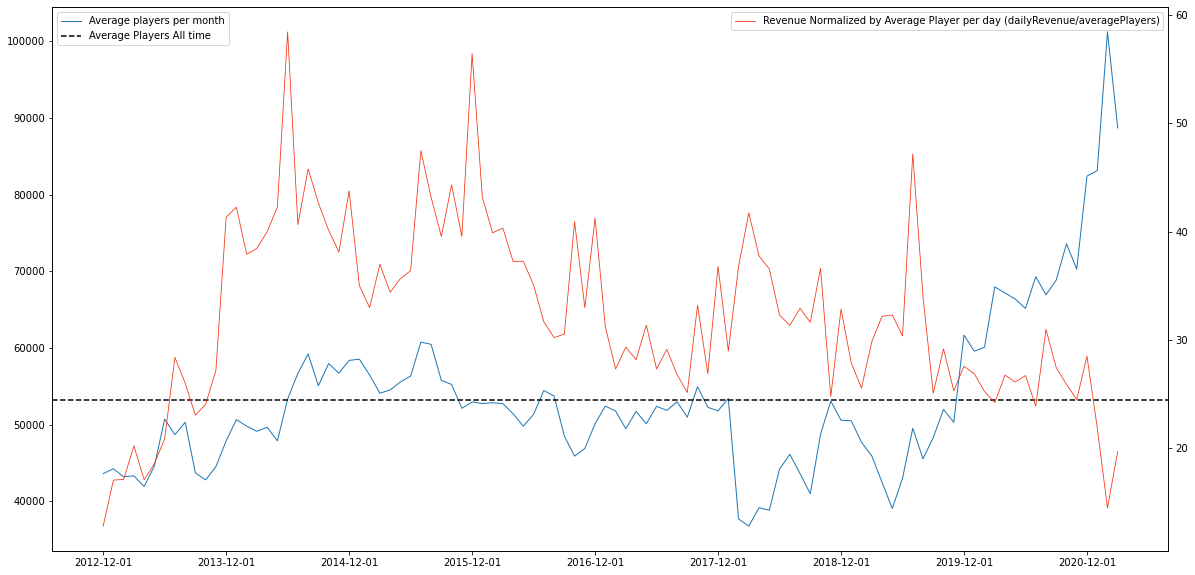

In [27]:
figure, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(df1[df1.columns[0]],df1[df1.columns[2]],linewidth=1,zorder=2)
ax2= ax1.twinx()
ax2.plot(norm,linewidth=1.2,zorder=1,color = '#f53514')
ax1.set_xticks(range(0,108,12))
averageplayers=ax1.axhline(mean,color="black",ls="--")
averageplayers.set_label("Average Players")
ax1.legend(["Average players per month","Average Players All time"],loc="upper left")
ax2.legend(["Revenue Normalized by Average Player per day (dailyRevenue/averagePlayers)"],loc="best")
plt.savefig("Graphs/440_graph.png")